In [1]:
import numpy as np
from scipy import ndimage
from scipy import signal
import glob
import matplotlib.pyplot as plt

In [2]:
#read in and sort image paths from directory containing images
#modify the path in .glob() to match location of images
images = glob.glob('/Users/danslaughter/Desktop/Data/*.png')
images = sorted(images)

In [3]:
image_list = []
peaks = []
delta = []
pixels = []
shifted = []

In [4]:
#this step is slow, could definitely be programmed better
for index in range(len(images)):
    image_orig = plt.imread(images[index])
    image_orig = image_orig[49:239] #clip image whitespace
    image_orig_resize = np.repeat(image_orig, 3, axis = 0) #resize along axis 1
    image_orig_resize = np.repeat(image_orig_resize, 3, axis = 1) #resize along axis 2
    image = np.sum(image_orig_resize.astype('float'), axis = 2) #collapse out RBG dimension
    image -= np.mean(image) #offset by mean
    image_list.append(image)

    fft_convolve = signal.fftconvolve(image_list[0], image_list[index][::-1, ::-1], mode='same') #determine offsets
    peaks.append(np.unravel_index(np.argmax(fft_convolve), fft_convolve.shape)) #determine peaks of fftconvolution

    delta.append([peaks[index][0] - peaks[0][0], peaks[index][1] - peaks[0][1], 0]) #offset of each image in pixels

    pixels.append([delta[index][0]/3,delta[index][1]/3]) #offset of each image (before resize) in pixels
    
    shifted.append(ndimage.interpolation.shift(image_orig_resize, delta[index])) #register images

In [5]:
print(pixels) #offset of each image (before resize) w.r.t. first image in pixels

[[0.0, 0.0], [3.0, -13.0], [35.0, -3.0], [19.0, -55.0], [21.0, -8.0], [8.0, -35.0], [19.0, -3.0], [59.0, -6.0], [38.0, 11.0], [19.0, -24.0], [36.0, -32.0], [14.0, -8.0], [41.0, -2.0], [-16.0, -27.0], [26.0, -36.0], [16.0, -32.0], [5.0, -36.0], [38.0, -21.0], [40.0, -21.0], [0.0, -56.0], [15.0, 16.0], [17.0, 19.0], [46.0, 0.0], [59.0, 11.0], [27.0, -42.0], [38.0, 29.0], [27.0, 6.0], [56.0, -19.0], [0.0, -37.0], [35.0, 0.0], [53.0, 21.0], [33.0, 17.0], [18.0, -15.0], [15.0, 45.0], [0.0, 0.0], [27.0, -3.0], [38.0, -1.0], [31.0, 4.0], [27.0, -8.0], [21.0, 3.0], [2.0, -49.0], [17.0, -31.0], [27.0, -33.0], [46.0, 10.0], [46.0, -2.0], [2.0, 11.0], [43.0, 3.0], [19.0, -19.0], [22.0, -47.0], [0.0, -10.0], [29.0, -46.0], [22.0, -12.0], [-4.0, 7.0], [0.0, -21.0], [8.0, -8.0], [38.0, -35.0], [45.0, 24.0], [8.0, -23.0], [65.0, -7.0], [-16.0, -14.0], [10.0, -30.0], [16.0, -41.0], [5.0, -2.0], [-3.0, -48.0], [35.0, 12.0], [35.0, -20.0], [21.0, -19.0], [0.0, -40.0], [18.0, 0.0], [5.0, -1.0], [26.0, -3

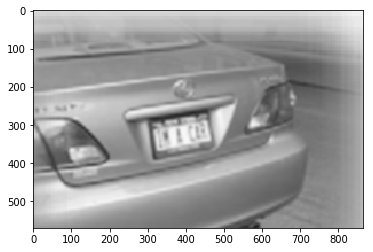

In [6]:
summed = np.mean(shifted, axis = 0) #combine all images
plt.imshow(summed)
plt.show() #im a car